In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_c  sv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set_style('darkgrid')

/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv
/kaggle/input/international-football-results-from-1872-to-2017/shootouts.csv
/kaggle/input/international-football-results-from-1872-to-2017/results.csv


**Here, the analysis is performed on goalscorers and results csv files**

In [2]:
gs= pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv')
rs= pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/results.csv')
gs

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44105,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,73.0,False,True
44106,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,90.0,False,True
44107,2024-02-11,Ivory Coast,Nigeria,Nigeria,William Troost-Ekong,38.0,False,False
44108,2024-02-11,Ivory Coast,Nigeria,Ivory Coast,Franck Kessié,62.0,False,False


In [3]:
rs

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47121,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True
47122,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True
47123,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True
47124,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True


**Data Inspection**

In [4]:
gs.columns

Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')

In [5]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [6]:
gs.shape

(44110, 8)

In [7]:
gs.describe()


,minute
count,43847.000000
mean,50.015212
std,26.354534
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


In [8]:
gs.select_dtypes(include='object').describe()

,date,home_team,away_team,team,scorer,own_goal,penalty
count,44110,44110,44110,44110,44060,44108,44108
unique,4599,220,220,220,14249,2,2
top,2011-10-11,Brazil,Uruguay,Brazil,Cristiano Ronaldo,False,False
freq,145,1021,782,1046,111,43302,41160


In [9]:
gs.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        50
minute       263
own_goal       2
penalty        2
dtype: int64

In [10]:
gs['date'] = pd.to_datetime(gs['date'])
gs['year'] = gs['date'].dt.year

In [11]:
gs.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 44110 entries, 0 to 44109
Series name: date
Non-Null Count  Dtype         
--------------  -----         
44110 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 344.7 KB


**Analysis**

# Which teams have played the most matches in the dataset?

In [12]:
gs['team'].value_counts(ascending=False).reset_index()

,team,count
0,Brazil,1046
1,Germany,963
2,Argentina,939
3,Spain,884
4,Netherlands,848
...,...,...
215,Eritrea,4
216,Somalia,3
217,Anguilla,2
218,South Sudan,2


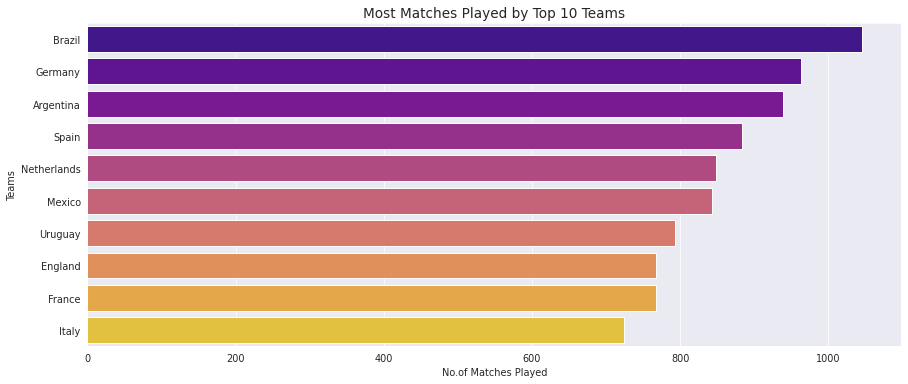

In [13]:
match_played=gs['team'].value_counts(ascending=False).head(10)
plt.figure(figsize=(15, 6), dpi=70)
sns.barplot(x=match_played.values, y=match_played.index, palette='plasma')
    
plt.title('Most Matches Played by Top 10 Teams', fontsize=14)
plt.xlabel('No.of Matches Played')
plt.ylabel('Teams')
plt.show()

# What is the distribution of matches played over the years?

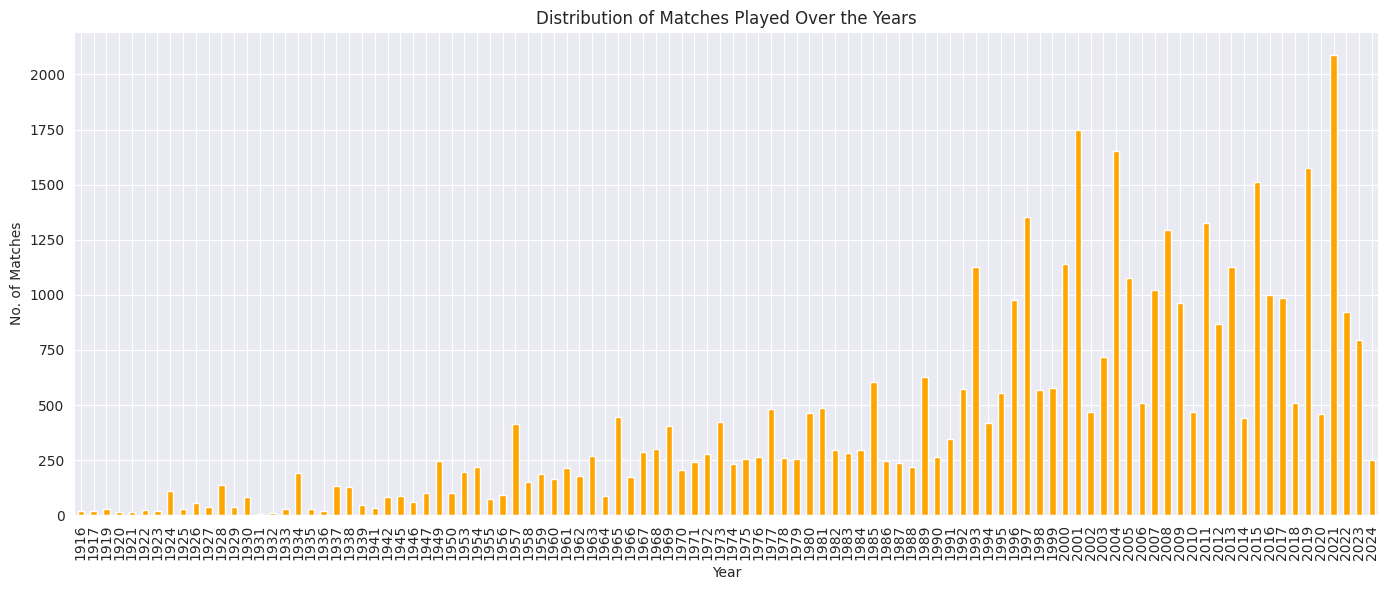

In [14]:
matches_by_year = gs.groupby('year').size()
plt.figure(figsize=(14, 6))
matches_by_year.plot(kind='bar', color='orange')
plt.title('Distribution of Matches Played Over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Matches')
plt.tight_layout()
plt.show()

# How many matches resulted in own goals?

In [15]:
gs['own_goal'].value_counts()

own_goal
False    43302
True       806
Name: count, dtype: int64

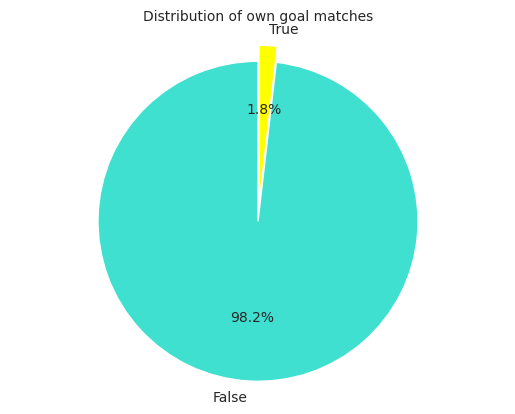

In [16]:
goals = gs['own_goal'].value_counts()
plt.pie(goals.values, labels= goals.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=['turquoise', 'yellow'])
plt.title('Distribution of own goal matches', size=10)
plt.axis('equal')
plt.show()

# Top Goal Scorer's 

In [17]:
gs['scorer'].value_counts(ascending=False).reset_index()

,scorer,count
0,Cristiano Ronaldo,111
1,Robert Lewandowski,62
2,Romelu Lukaku,61
3,Harry Kane,55
4,Lionel Messi,54
...,...,...
14244,Martin Andresen,1
14245,Simen Brenne,1
14246,Zvezdan Cvetković,1
14247,Zvonko Živković,1


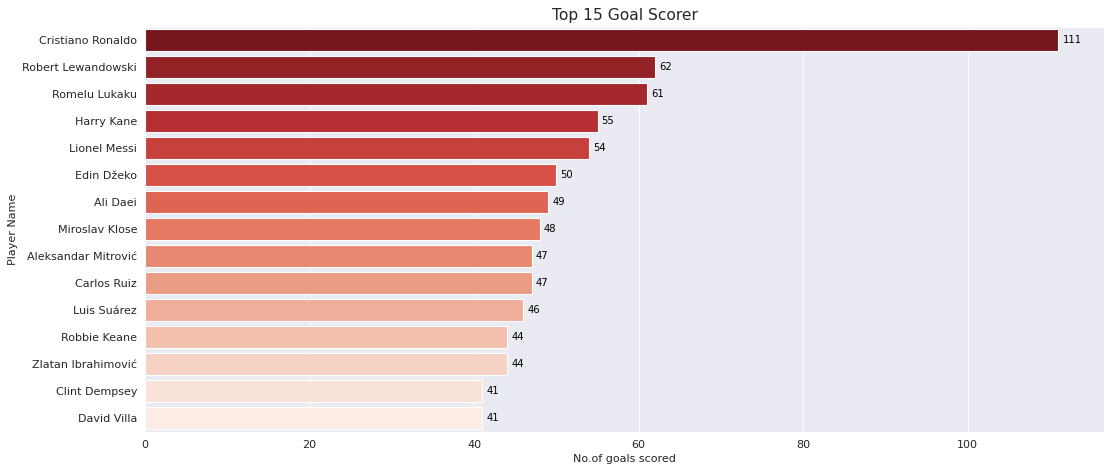

In [18]:
top_gs = gs['scorer'].value_counts(ascending=False).head(15)
plt.figure(figsize=(14,6), dpi=80)
sns.barplot(x=top_gs.values, y=top_gs.index, palette='Reds_r')

for i, v in enumerate(top_gs.values):
    plt.text(x=v+0.5, y=i, s=str(v), fontsize=9, color='black', va='center')
    
plt.title('Top 15 Goal Scorer', fontsize=14)
plt.xlabel('No.of goals scored')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()

# What is the frequency of penalty goals in matches?

In [19]:
gs['penalty'].value_counts().reset_index()

,penalty,count
0,False,41160
1,True,2948


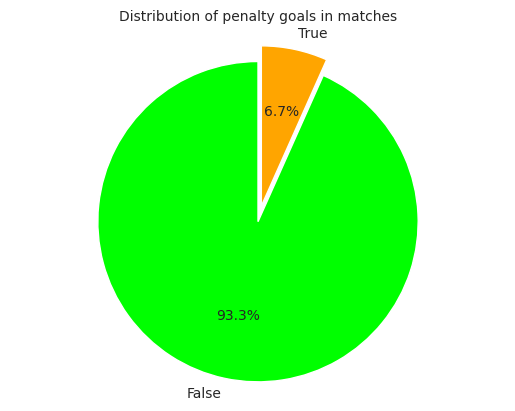

In [20]:
pen = gs['penalty'].value_counts()
plt.pie(pen.values, labels= pen.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=['lime', 'orange'])
plt.title('Distribution of penalty goals in matches', size=10)
plt.axis('equal')
plt.show()

In [21]:
gs.groupby('scorer')['penalty'].sum().sort_values(ascending=False).reset_index()

,scorer,penalty
0,Cristiano Ronaldo,19
1,Harry Kane,19
2,Lionel Messi,14
3,Hristo Stoichkov,13
4,Robert Lewandowski,12
...,...,...
14244,Han Peng,0
14245,Hani Al Saqer,0
14246,Hannes Löhr,0
14247,Hannes Reinmayr,0


In [22]:
gs

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916
...,...,...,...,...,...,...,...,...,...
44105,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,73.0,False,True,2024
44106,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,90.0,False,True,2024
44107,2024-02-11,Ivory Coast,Nigeria,Nigeria,William Troost-Ekong,38.0,False,False,2024
44108,2024-02-11,Ivory Coast,Nigeria,Ivory Coast,Franck Kessié,62.0,False,False,2024


# Analysis of results.csv

In [23]:
rs

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47121,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True
47122,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True
47123,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True
47124,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True


In [24]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47126 entries, 0 to 47125
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47126 non-null  object 
 1   home_team   47111 non-null  object 
 2   away_team   47111 non-null  object 
 3   home_score  47075 non-null  float64
 4   away_score  47075 non-null  float64
 5   tournament  47126 non-null  object 
 6   city        47126 non-null  object 
 7   country     47126 non-null  object 
 8   neutral     47126 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [25]:
rs.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [26]:
rs.shape

(47126, 9)

In [27]:
rs.describe()

,home_score,away_score
count,47075.000000,47075.000000
mean,1.761190,1.183452
std,1.776751,1.402597
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [28]:
rs.select_dtypes(include='object').describe()

,date,home_team,away_team,tournament,city,country
count,47126,47111,47111,47126,47126,47126
unique,16180,328,323,174,2058,271
top,2012-02-29,Brazil,Uruguay,Friendly,Kuala Lumpur,United States
freq,66,600,567,17902,724,1353


In [29]:
rs.isna().sum()

date           0
home_team     15
away_team     15
home_score    51
away_score    51
tournament     0
city           0
country        0
neutral        0
dtype: int64

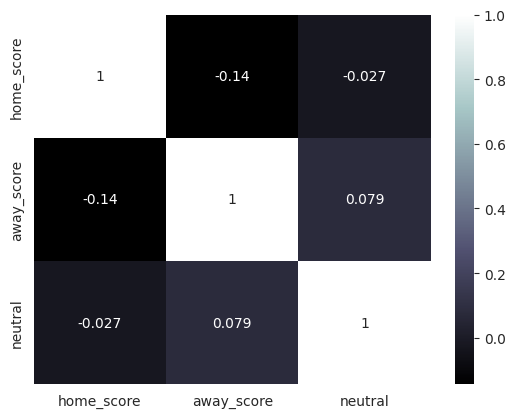

In [30]:
sns.heatmap(rs.corr(numeric_only=True),annot=True, cmap='bone')
plt.show()

In [31]:
rs['date'] = pd.to_datetime(rs['date'])
rs['year'] = rs['date'].dt.year

In [32]:
inner_join_df = pd.merge(gs, rs, on=['date', 'home_team', 'away_team'], how='inner')
print('Inner Join Result:')
print(inner_join_df.head())

Inner Join Result:
        date  home_team away_team       team            scorer  minute  \
0 1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1 1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2 1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3 1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4 1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

  own_goal penalty  year_x  home_score  away_score    tournament  \
0    False   False    1916         0.0         4.0  Copa América   
1    False   False    1916         0.0         4.0  Copa América   
2    False   False    1916         0.0         4.0  Copa América   
3    False   False    1916         0.0         4.0  Copa América   
4    False   False    1916         6.0         1.0  Copa América   

           city    country  neutral  year_y  
0  Buenos Aires  Argentina     True    1916  
1  Buenos Aires  Argentina     True

In [33]:
outer_join_df = pd.merge(gs, rs, on=['date', 'home_team', 'away_team'], how='outer')
print('Outer Join Result:')
print(outer_join_df)

Outer Join Result:
            date home_team away_team team scorer  minute own_goal penalty  \
0     1872-11-30  Scotland   England  NaN    NaN     NaN      NaN     NaN   
1     1873-03-08   England  Scotland  NaN    NaN     NaN      NaN     NaN   
2     1874-03-07  Scotland   England  NaN    NaN     NaN      NaN     NaN   
3     1875-03-06   England  Scotland  NaN    NaN     NaN      NaN     NaN   
4     1876-03-04  Scotland   England  NaN    NaN     NaN      NaN     NaN   
...          ...       ...       ...  ...    ...     ...      ...     ...   
76955 2024-07-06       NaN       NaN  NaN    NaN     NaN      NaN     NaN   
76956 2024-07-06       NaN       NaN  NaN    NaN     NaN      NaN     NaN   
76957 2024-07-09       NaN       NaN  NaN    NaN     NaN      NaN     NaN   
76958 2024-07-10       NaN       NaN  NaN    NaN     NaN      NaN     NaN   
76959 2024-07-14       NaN       NaN  NaN    NaN     NaN      NaN     NaN   

       year_x  home_score  away_score tournament        

In [34]:
team_name = 'France'
team_goals = inner_join_df[inner_join_df['team']==team_name]
print(f"Filtered Results for {team_name}:")
team_goals

Filtered Results for France:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year_x,home_score,away_score,tournament,city,country,neutral,year_y
166,1924-05-27,France,Latvia,France,Édouard Crut,17.0,False,False,1924,7.0,0.0,Olympic Games,Paris,France,False,1924
167,1924-05-27,France,Latvia,France,Paul Nicolas,25.0,False,False,1924,7.0,0.0,Olympic Games,Paris,France,False,1924
168,1924-05-27,France,Latvia,France,Édouard Crut,28.0,False,False,1924,7.0,0.0,Olympic Games,Paris,France,False,1924
169,1924-05-27,France,Latvia,France,Paul Nicolas,50.0,False,False,1924,7.0,0.0,Olympic Games,Paris,France,False,1924
170,1924-05-27,France,Latvia,France,Édouard Crut,55.0,False,False,1924,7.0,0.0,Olympic Games,Paris,France,False,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43787,2023-11-18,France,Gibraltar,France,Kylian Mbappé,82.0,False,False,2023,14.0,0.0,UEFA Euro qualification,Nice,France,False,2023
43788,2023-11-18,France,Gibraltar,France,Olivier Giroud,89.0,False,False,2023,14.0,0.0,UEFA Euro qualification,Nice,France,False,2023
43789,2023-11-18,France,Gibraltar,France,Olivier Giroud,90.0,False,False,2023,14.0,0.0,UEFA Euro qualification,Nice,France,False,2023
43851,2023-11-21,Greece,France,France,Randal Kolo Muani,42.0,False,False,2023,2.0,2.0,UEFA Euro qualification,Athens,Greece,False,2023


In [35]:
team_name = 'Portugal'
team_goals = inner_join_df[inner_join_df['team']==team_name]
print(f"Filtered Results for {team_name}:")
team_goals

Filtered Results for Portugal:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year_x,home_score,away_score,tournament,city,country,neutral,year_y
375,1928-05-27,Portugal,Chile,Portugal,Vítor Silva,38.0,False,False,1928,4.0,2.0,Olympic Games,Amsterdam,Netherlands,True,1928
376,1928-05-27,Portugal,Chile,Portugal,Pepe Soares,40.0,False,False,1928,4.0,2.0,Olympic Games,Amsterdam,Netherlands,True,1928
377,1928-05-27,Portugal,Chile,Portugal,Pepe Soares,50.0,False,False,1928,4.0,2.0,Olympic Games,Amsterdam,Netherlands,True,1928
378,1928-05-27,Portugal,Chile,Portugal,Valdemar Mota,63.0,False,False,1928,4.0,2.0,Olympic Games,Amsterdam,Netherlands,True,1928
411,1928-05-29,Portugal,Yugoslavia,Portugal,Vítor Silva,25.0,False,False,1928,2.0,1.0,Olympic Games,Amsterdam,Netherlands,True,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43680,2023-10-16,Bosnia and Herzegovina,Portugal,Portugal,João Félix,41.0,False,False,2023,0.0,5.0,UEFA Euro qualification,Zenica,Bosnia and Herzegovina,False,2023
43734,2023-11-16,Liechtenstein,Portugal,Portugal,Cristiano Ronaldo,46.0,False,False,2023,0.0,2.0,UEFA Euro qualification,Vaduz,Liechtenstein,False,2023
43735,2023-11-16,Liechtenstein,Portugal,Portugal,João Cancelo,57.0,False,False,2023,0.0,2.0,UEFA Euro qualification,Vaduz,Liechtenstein,False,2023
43811,2023-11-19,Portugal,Iceland,Portugal,Bruno Fernandes,37.0,False,False,2023,2.0,0.0,UEFA Euro qualification,Lisbon,Portugal,False,2023


In [36]:
team_name = 'Argentina'
team_goals = inner_join_df[inner_join_df['team']==team_name]
print(f"Filtered Results for {team_name}:")
team_goals

Filtered Results for Argentina:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year_x,home_score,away_score,tournament,city,country,neutral,year_y
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916,6.0,1.0,Copa América,Buenos Aires,Argentina,False,1916
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True,1916,6.0,1.0,Copa América,Buenos Aires,Argentina,False,1916
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True,1916,6.0,1.0,Copa América,Buenos Aires,Argentina,False,1916
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False,1916,6.0,1.0,Copa América,Buenos Aires,Argentina,False,1916
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False,1916,6.0,1.0,Copa América,Buenos Aires,Argentina,False,1916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43052,2022-12-13,Argentina,Croatia,Argentina,Julián Álvarez,39.0,False,False,2022,3.0,0.0,FIFA World Cup,Lusail,Qatar,True,2022
43053,2022-12-13,Argentina,Croatia,Argentina,Julián Álvarez,69.0,False,False,2022,3.0,0.0,FIFA World Cup,Lusail,Qatar,True,2022
43059,2022-12-18,Argentina,France,Argentina,Lionel Messi,23.0,False,True,2022,3.0,3.0,FIFA World Cup,Lusail,Qatar,True,2022
43060,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False,2022,3.0,3.0,FIFA World Cup,Lusail,Qatar,True,2022


# What are the most common tournaments played in the dataset?

In [37]:
rs.tournament.value_counts(ascending=False).reset_index()

,tournament,count
0,Friendly,17902
1,FIFA World Cup qualification,8052
2,UEFA Euro qualification,2824
3,African Cup of Nations qualification,2116
4,FIFA World Cup,964
...,...,...
169,Copa Confraternidad,1
170,Real Madrid 75th Anniversary Cup,1
171,The Other Final,1
172,TIFOCO Tournament,1


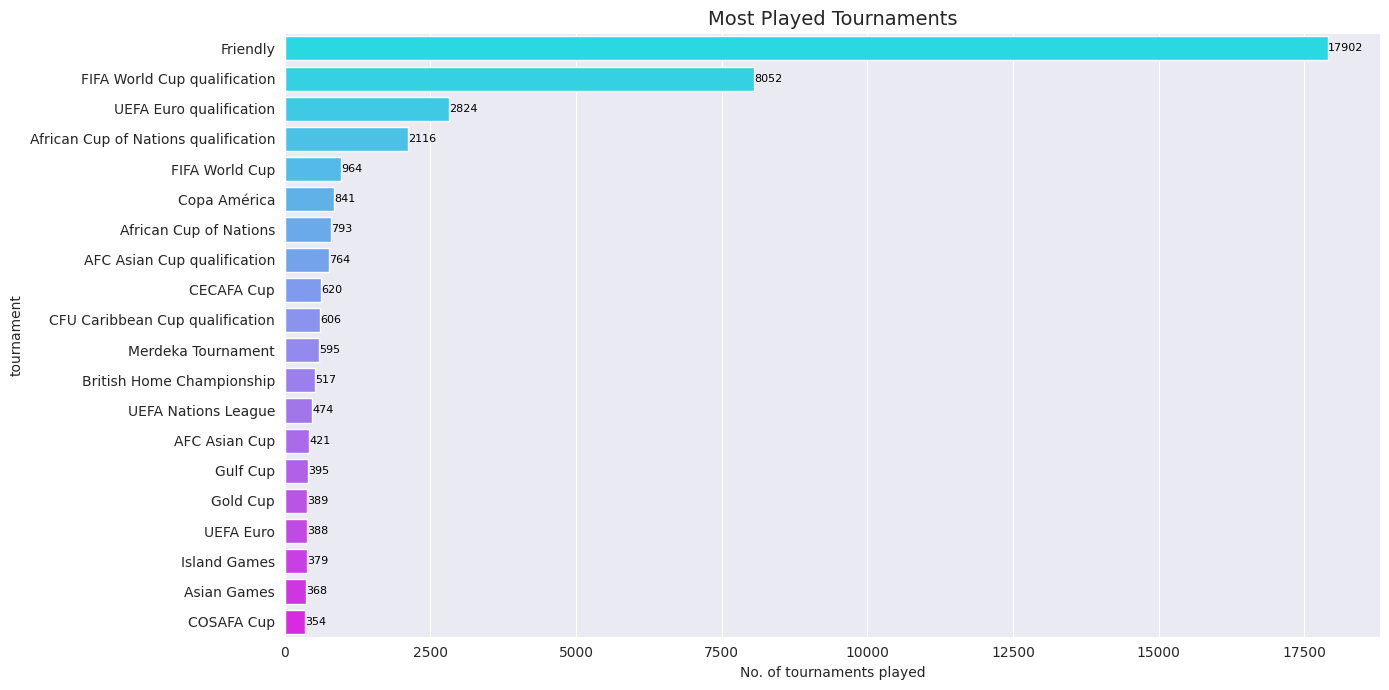

In [38]:
tournaments = rs.tournament.value_counts(ascending=False).head(20)
plt.figure(figsize=(14, 7))
sns.barplot(x=tournaments.values, y=tournaments.index, palette='cool')

for i, v in enumerate(tournaments.values):
    plt.text(x=v+0.5, y=i, s=str(v), fontsize=8, color='black', va='center')
    
plt.title('Most Played Tournaments', size=14)
plt.xlabel('No. of tournaments played')
plt.tight_layout(pad=1.08)
plt.show()

# Is there any trend in the number of matches played over the years?

In [39]:
rs['year'].value_counts(ascending=False).reset_index()

,year,count
0,2019,1147
1,2021,1115
2,2011,1115
3,2008,1101
4,2004,1079
...,...,...
148,1878,2
149,1874,1
150,1873,1
151,1875,1


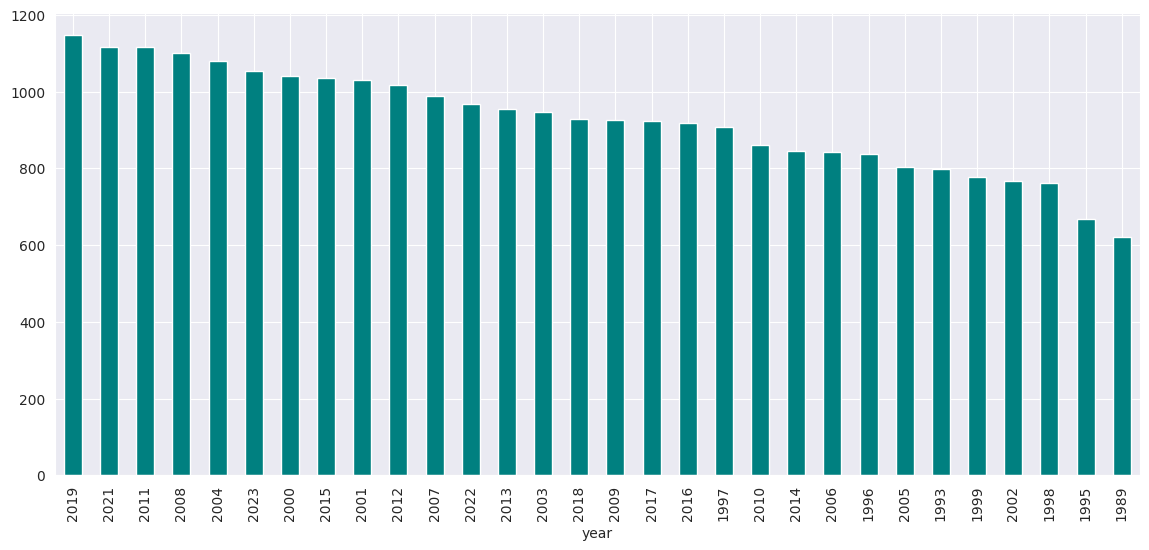

In [40]:
matches=rs['year'].value_counts().head(30)
plt.figure(figsize=(14,6))
matches.plot(kind='bar', color='teal')

plt.show()

# Which countries have the highest number of matches recorded?

In [41]:
rs.groupby('country')['tournament'].size().sort_values(ascending=False).reset_index()

,country,tournament
0,United States,1353
1,France,887
2,Malaysia,812
3,England,743
4,Thailand,699
...,...,...
266,Mali Federation,1
267,Micronesia,1
268,Bohemia and Moravia,1
269,Belgian Congo,1


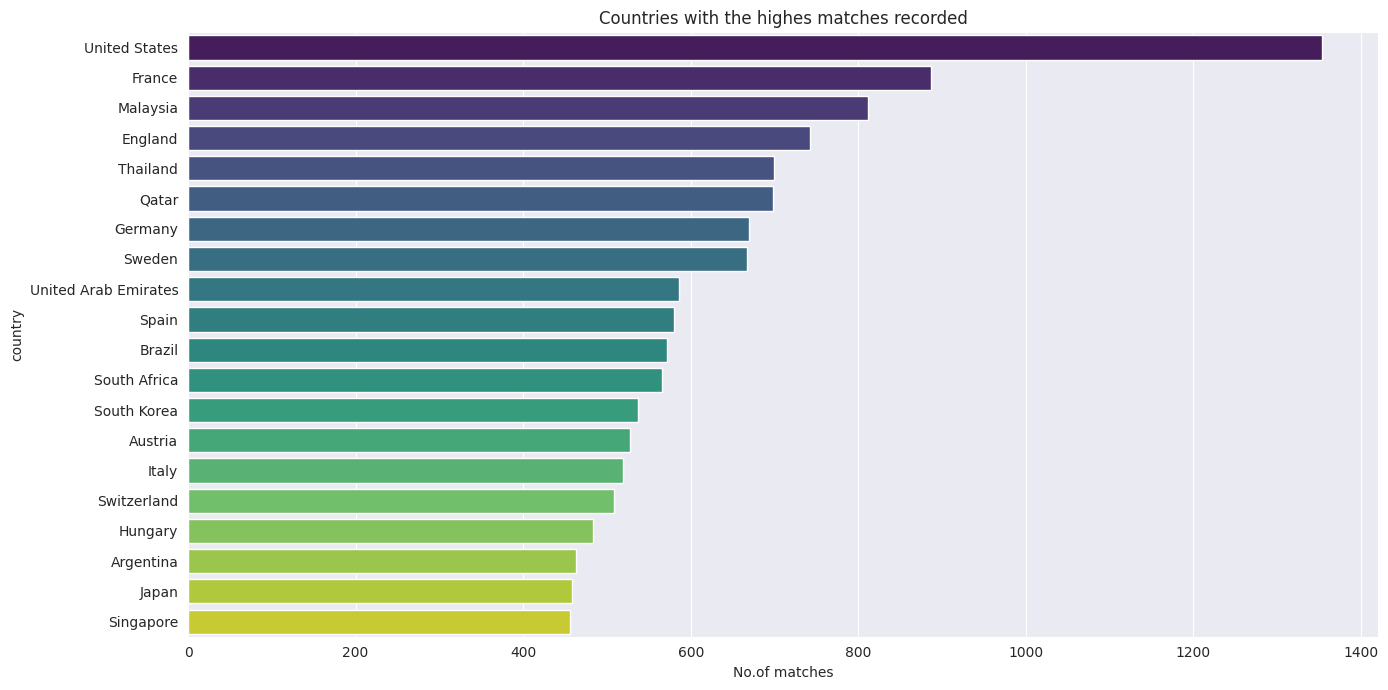

In [42]:
country = rs.groupby('country')['tournament'].size().sort_values(ascending=False).head(20)
plt.figure(figsize=(14, 7))
sns.barplot(x=country.values, y=country.index, palette='viridis')
plt.title('Countries with the highes matches recorded')
plt.xlabel('No.of matches')
plt.tight_layout(pad=1.08)
plt.show()

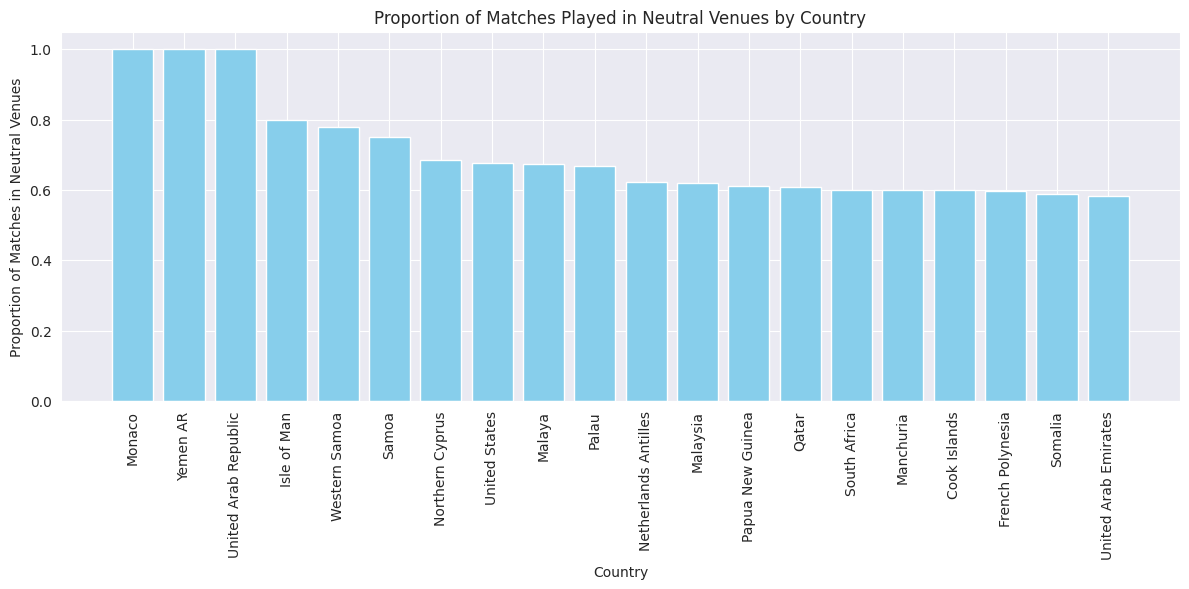

In [43]:
matches_grouped = rs.groupby('country')['neutral'].mean().reset_index()

matches_grouped = matches_grouped[matches_grouped['neutral'] > 0]

matches_grouped = matches_grouped.sort_values(by='neutral', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(matches_grouped['country'], matches_grouped['neutral'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Proportion of Matches in Neutral Venues')
plt.title('Proportion of Matches Played in Neutral Venues by Country')
plt.xticks(rotation=90)
plt.tight_layout(pad=1.09)
plt.show()

# home_score and away_score comparision plot

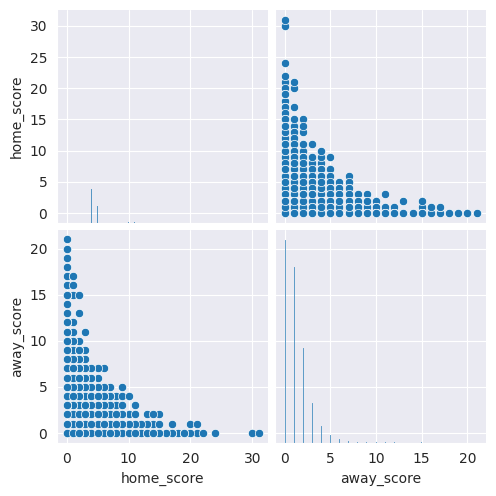

In [44]:
sns.pairplot(rs.iloc[:,3:5])
plt.show()

**The analysis of football match data reveals interesting insights into the prevalence of neutral venues across different countries. By examining the proportion of matches played in neutral venues, we can observe variations in the hosting patterns among nations. This information can be valuable for understanding the dynamics of international football tournaments and the factors influencing venue selections. Further exploration and context-specific considerations may provide deeper insights into the reasons behind the prevalence of neutral venues in certain regions.**